In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import layers
from keras import utils
import tensorflow_addons as tfa
from keras.metrics import Precision
from keras.metrics import Recall
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers import Flatten
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import SpatialDropout1D
from keras.layers import LSTM
from sklearn.utils import shuffle
from tensorflow.keras.layers import Attention, Lambda
from tensorflow.keras.layers import Layer
from tensorflow.python.keras.models import Input, Model
from tensorflow.keras.layers import Layer, Conv1D, Add
from imblearn.over_sampling import RandomOverSampler
from keras import backend as K
import xgboost as xgb

C:\ProgramData\anaconda3\envs\gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\ProgramData\anaconda3\envs\gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you wa

In [2]:
data = pd.read_csv('audit_risk.csv')

In [3]:
data

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [4]:
data['Money_Value'] = data['Money_Value'].fillna(data['Money_Value'].mean())

In [5]:
data = data[data['LOCATION_ID']!='LOHARU']
data = data[data['LOCATION_ID']!='NUH']
data = data[data['LOCATION_ID']!='SAFIDON']

In [6]:
data['LOCATION_ID'] = data['LOCATION_ID'].astype('int')

In [7]:
data.describe()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,...,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.0,773.000000,773.000000
mean,20.255149,14.856404,2.457983,0.351876,1.355928,10.841903,0.313583,6.358590,13.268062,5.067917,...,0.519534,0.104787,0.216818,0.053816,2.705304,17.743158,0.573351,0.5,7.194763,0.394567
std,24.339709,9.891317,5.688509,0.174137,3.446223,50.176308,0.169987,30.128623,51.406241,0.264928,...,0.290780,0.532022,0.068111,0.306411,0.859470,54.837264,0.445314,0.0,38.740186,0.489074
min,1.850000,1.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,8.000000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.540000,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.584000,0.400000,0.5,0.316800,0.000000
50%,3.890000,13.000000,0.880000,0.200000,0.176000,0.410000,0.200000,0.082000,1.390000,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.218000,0.400000,0.5,0.577600,0.000000
75%,55.570000,19.000000,2.480000,0.600000,1.488000,4.160000,0.400000,1.980000,7.760000,5.000000,...,0.400000,0.000000,0.200000,0.000000,3.400000,10.782000,0.400000,0.5,3.258000,1.000000
max,59.850000,44.000000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [8]:
data.dtypes

Sector_score      float64
LOCATION_ID         int32
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [9]:
data.Risk.value_counts()

Risk
0    468
1    305
Name: count, dtype: int64

In [10]:
data['Risk_val'] = np.where(data['Risk']==1, 'Risk', 'Legitimate')

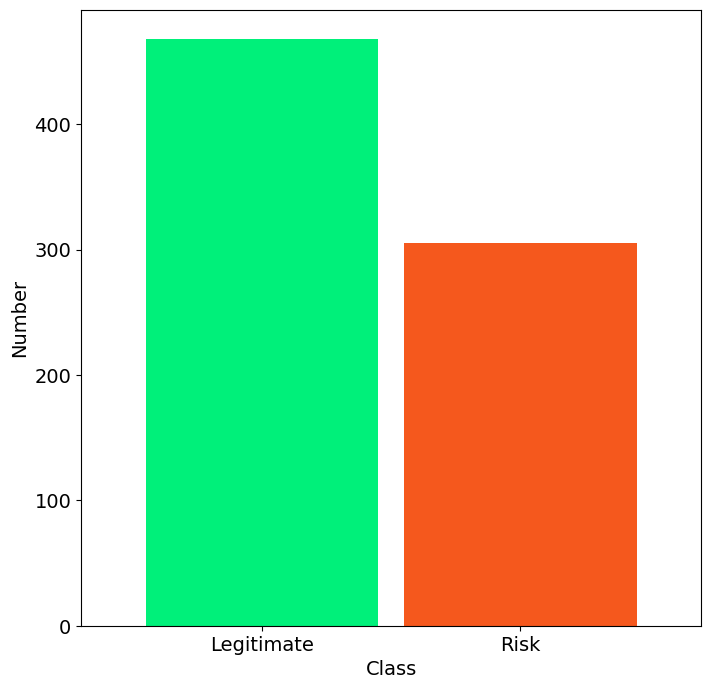

In [11]:
plt.figure(figsize=[8,8])
data.Risk_val.value_counts().plot(kind='bar', width=0.9, color=['#00F07A','#F5581D'])
plt.xlabel('Class',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [12]:
X = data.drop(['Risk', 'Risk_val'], axis=1)

In [13]:
X

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [16]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.035172,0.511628,0.049176,1.0,0.049176,0.001977,0.0,0.000659,0.005264,0.00,...,0.0,0.0,0.0,0.0,0.0,0.125,0.008969,0.0,0.0,0.001493
1,0.035172,0.116279,0.000000,0.0,0.000000,0.003819,0.0,0.001273,0.003806,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000,0.001443,0.0,0.0,0.000240
2,0.035172,0.116279,0.006000,0.0,0.002000,0.000182,0.0,0.000061,0.000583,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000185,0.0,0.0,0.000031
3,0.035172,0.116279,0.000000,0.0,0.000000,0.008540,1.0,0.008540,0.008511,0.25,...,0.0,0.0,0.0,0.0,0.0,0.750,0.020166,0.0,0.0,0.003356
4,0.035172,0.116279,0.000000,0.0,0.000000,0.000063,0.0,0.000021,0.000063,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000020,0.0,0.0,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0.926207,0.186047,0.005765,0.0,0.001922,0.000316,0.0,0.000105,0.000701,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000223,0.0,0.0,0.000037
769,0.926207,0.348837,0.005529,0.0,0.001843,0.000293,0.0,0.000098,0.000662,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000210,0.0,0.0,0.000035
770,0.926207,0.302326,0.002824,0.0,0.000941,0.000032,0.0,0.000011,0.000221,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000070,0.0,0.0,0.000012
771,0.926207,0.395349,0.002353,0.0,0.000784,0.000000,0.0,0.000000,0.000158,0.00,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000050,0.0,0.0,0.000008


# Chi-square feature selection technique

In [17]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [18]:
y = data['Risk']

In [19]:
y

0      1
1      0
2      0
3      1
4      0
      ..
771    0
772    0
773    0
774    0
775    0
Name: Risk, Length: 773, dtype: int64

In [20]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [21]:
fit_feat = bestfeatures.fit(X_scaled,y)

In [22]:
scores = pd.DataFrame(fit_feat.scores_)
columns = pd.DataFrame(X_scaled.columns)

In [23]:
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']

In [24]:
print(featureScores.nlargest(10,'Score'))

    Specs       Score
13     13  255.833129
6       6  197.999586
21     21  155.878689
3       3  147.503320
15     15   93.687438
0       0   67.660876
10     10   65.605757
19     19   47.366627
17     17   46.160847
11     11   38.675973


In [25]:
bestfeatures_list = featureScores.nlargest(10,'Score')['Specs']

In [26]:
bestfeatures_list = bestfeatures_list.tolist()
bestfeatures_list

[13, 6, 21, 3, 15, 0, 10, 19, 17, 11]

In [27]:
X_scaled_best = X_scaled[bestfeatures_list]

In [28]:
X_scaled_best

,13,6,21,3,15,0,10,19,17,11
0,0.0,0.0,0.125,1.0,0.0,0.035172,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000,0.0,0.0,0.035172,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000,0.0,0.0,0.035172,0.0,0.0,0.0,0.000000
3,1.0,1.0,0.750,0.0,0.0,0.035172,1.0,0.0,0.0,0.590909
4,0.0,0.0,0.000,0.0,0.0,0.035172,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
768,0.0,0.0,0.000,0.0,0.0,0.926207,0.0,0.0,0.0,0.000000
769,0.0,0.0,0.000,0.0,0.0,0.926207,0.0,0.0,0.0,0.000000
770,0.0,0.0,0.000,0.0,0.0,0.926207,0.0,0.0,0.0,0.000000
771,0.0,0.0,0.000,0.0,0.0,0.926207,0.0,0.0,0.0,0.000000


In [29]:
y

0      1
1      0
2      0
3      1
4      0
      ..
771    0
772    0
773    0
774    0
775    0
Name: Risk, Length: 773, dtype: int64

In [30]:
ros = RandomOverSampler(random_state=42)

In [31]:
X_resampled, y_resampled = ros.fit_resample(X_scaled_best, y)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [33]:
algorithms = ['Naive Bayes','Support vector machine','Decision tree','Random Forest','XGBoost']

In [34]:
metrics_list_train = []
metrics_list_test = []

In [35]:
matrix_labels = ['Risk','Legitimate']

In [36]:
import sklearn.metrics as metrics

In [37]:
classifiers = [MultinomialNB(), SVC(kernel='linear'),DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None), 
RandomForestClassifier(n_estimators = 10), xgb.XGBClassifier(random_state=42)]

In [38]:
k = 0
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for i in classifiers:
    val_scores = cross_validate(i, x_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=cv)     
    y_pred_train = cross_val_predict(i, x_train, y_train, cv=cv)

    accuracy_train = val_scores['test_accuracy'].mean()
    precision_train = val_scores['test_precision'].mean()
    recall_train = val_scores['test_recall'].mean()
    f1_train = val_scores['test_f1'].mean()
    
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(y_train, y_pred_train)
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    metrics_list_train.append({'Accuracy': accuracy_train,
                        'Precision': precision_train,
                        'Recall': recall_train,
                        'F1-score': f1_train,
                        'fpr': fpr_train,
                        'tpr': tpr_train,
                        'auc': roc_auc_train})
    
    y_pred_test = cross_val_predict(i, x_test, y_test, cv=cv)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(y_test, y_pred_test)
    roc_auc_test = metrics.auc(fpr_test, tpr_test)
    metrics_list_test.append({'Accuracy': accuracy_test,
                        'Precision': precision_test,
                        'Recall': recall_test,
                        'F1-score': f1_test,
                        'fpr': fpr_test,
                        'tpr': tpr_test,
                        'auc': roc_auc_test})
    
    print("Evaluation metrics of " + algorithms[k]+" algorithm: ")
    print("Training scores: ")
    print("Accuracy - ", round(accuracy_train,2))
    print("Precision - ", round(precision_train,2))
    print("Recall - ", round(recall_train,2))
    print("F1-score - ", round(f1_train,2))
    print("Test scores: ")
    print('Accuracy - ', round(accuracy_test,2))  
    print('Precision - ', round(precision_test,2))
    print('Recall - ', round(recall_test,2))
    print('F1-score - ', round(f1_test,2))
    print(" ")
    k = k + 1

Evaluation metrics of Naive Bayes algorithm: 
Training scores: 
Accuracy -  0.86
Precision -  0.8
Recall -  0.95
F1-score -  0.87
Test scores: 
Accuracy -  0.81
Precision -  0.76
Recall -  0.91
F1-score -  0.83
 
Evaluation metrics of Support vector machine algorithm: 
Training scores: 
Accuracy -  0.95
Precision -  0.96
Recall -  0.94
F1-score -  0.95
Test scores: 
Accuracy -  0.93
Precision -  0.92
Recall -  0.95
F1-score -  0.93
 
Evaluation metrics of Decision tree algorithm: 
Training scores: 
Accuracy -  0.96
Precision -  0.97
Recall -  0.95
F1-score -  0.96
Test scores: 
Accuracy -  0.93
Precision -  0.94
Recall -  0.92
F1-score -  0.93
 
Evaluation metrics of Random Forest algorithm: 
Training scores: 
Accuracy -  0.96
Precision -  0.97
Recall -  0.95
F1-score -  0.96
Test scores: 
Accuracy -  0.94
Precision -  0.96
Recall -  0.93
F1-score -  0.94
 
Evaluation metrics of XGBoost algorithm: 
Training scores: 
Accuracy -  0.96
Precision -  0.97
Recall -  0.95
F1-score -  0.96
Tes

In [39]:
x_train.shape

(702, 10)

In [40]:
x_test.shape

(234, 10)

In [41]:
model_dnn = Sequential()
model_dnn.add(Dense(256, input_dim=10))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(128))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(1))
model_dnn.add(Activation('sigmoid'))
model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall(),
                                                                         tfa.metrics.FBetaScore(num_classes=2,average="micro",threshold=0.9)])
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [42]:
history_dnn = model_dnn.fit(x_train, y_train, batch_size = 128, epochs = 100, verbose=1, validation_split=0.1)
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy_dnn))
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {:.4f}".format(accuracy_dnn))

Epoch 1/100
5/5 [==============================] - 1s 72ms/step - loss: 0.6542 - accuracy: 0.6387 - precision: 0.5890 - recall: 0.8910 - fbeta_score: 0.0000e+00 - val_loss: 0.5691 - val_accuracy: 0.8592 - val_precision: 0.7917 - val_recall: 1.0000 - val_fbeta_score: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 0.5523 - accuracy: 0.8494 - precision: 0.7679 - recall: 0.9968 - fbeta_score: 0.0000e+00 - val_loss: 0.4696 - val_accuracy: 0.8873 - val_precision: 0.8261 - val_recall: 1.0000 - val_fbeta_score: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.4704 - accuracy: 0.8574 - precision: 0.7789 - recall: 0.9936 - fbeta_score: 0.0800 - val_loss: 0.3906 - val_accuracy: 0.8873 - val_precision: 0.8261 - val_recall: 1.0000 - val_fbeta_score: 0.4490
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.3911 - accuracy: 0.8590 - precision: 0.7823 - recall: 0.9904 - fbeta_score: 0.4516 - val_loss: 0.327

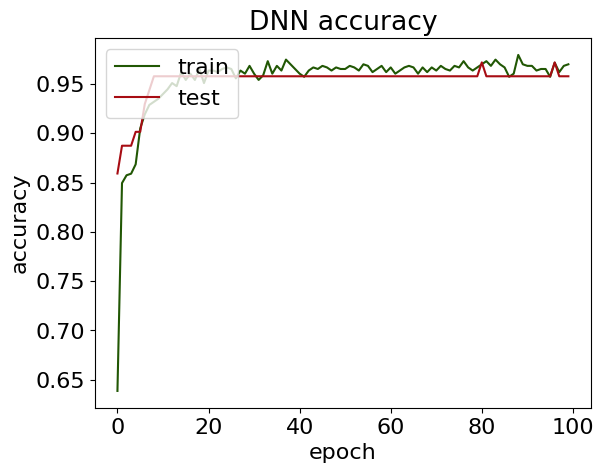

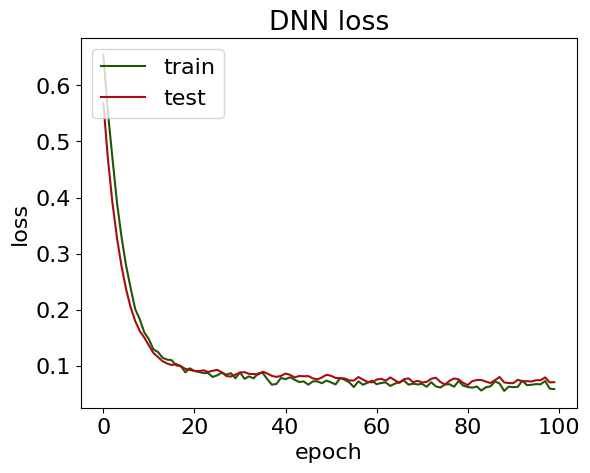

In [43]:
#plot for accuracy
plt.rcParams['font.size'] = 16
plt.plot(history_dnn.history['accuracy'], color='#215704')
plt.plot(history_dnn.history['val_accuracy'], color='#A70C13')
plt.title('DNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plot for loss
plt.plot(history_dnn.history['loss'], color='#215704')
plt.plot(history_dnn.history['val_loss'], color='#A70C13')
plt.title('DNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
val_accuracy_list = np.array(history_dnn.history['val_accuracy'])
val_accuracy = round(np.mean(val_accuracy_list),2)

val_precision_list = np.array(history_dnn.history['val_precision'])
val_precision = round(np.mean(val_precision_list),2)

val_recall_list = np.array(history_dnn.history['val_recall'])
val_recall = round(np.mean(val_recall_list),2)

val_f1_list = np.array(history_dnn.history['val_fbeta_score'])
val_f1 = round(np.mean(val_f1_list),2)

In [45]:
y_pred_train = model_dnn.predict(x_train)

22/22 [==============================] - 0s 1ms/step


In [46]:
y_pred_train = list(map(lambda x: 0 if x<0.5 else 1, y_pred_train))

In [47]:
y_pred_train

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [48]:
accuracy_train = accuracy_score(y_train, y_pred_train )
precision_train = precision_score(y_train, y_pred_train )
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)

In [49]:
print("Scores training:")
print("Accuracy - ", round(accuracy_train,2))
print("Precision - ", round(precision_train,2))
print("Recall - ", round(recall_train,2))
print("F1-score - ", round(f1_score_train,2))

Scores training:
Accuracy -  0.97
Precision -  0.99
Recall -  0.95
F1-score -  0.97


In [50]:
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred_train)
roc_auc = metrics.auc(fpr, tpr)

In [51]:
metrics_list_train.append({'Accuracy': accuracy_train,
                    'Precision': precision_train,
                    'Recall': recall_train,
                    'F1-score': f1_score_train,
                    'fpr': fpr,
                    'tpr': tpr,
                    'auc': roc_auc})

In [52]:
max_features = 10
nb_filter = 250
filter_length = 3
hidden_dims = 250

In [53]:
# CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=nb_filter, kernel_size=filter_length, activation='relu', input_shape=(10,1)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(hidden_dims)) 
model_cnn.add(Dropout(0.2)) 
model_cnn.add(Activation('relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall(),
                                                                         tfa.metrics.FBetaScore(num_classes=2,average="micro",threshold=0.9)])
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 250)            1000      
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 250)               62750     
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 activation_3 (Activation)   (None, 250)               0         
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                      

In [54]:
history_cnn = model_cnn.fit(x_train, y_train, batch_size = 4096, epochs = 20, verbose=1, validation_split=0.1)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6890 - accuracy: 0.5341 - precision_1: 0.5269 - recall_1: 0.5641 - fbeta_score: 0.0000e+00 - val_loss: 0.6775 - val_accuracy: 0.5352 - val_precision_1: 0.5352 - val_recall_1: 1.0000 - val_fbeta_score: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 39ms/step - loss: 0.6806 - accuracy: 0.5626 - precision_1: 0.5407 - recall_1: 0.7660 - fbeta_score: 0.0000e+00 - val_loss: 0.6673 - val_accuracy: 0.5352 - val_precision_1: 0.5352 - val_recall_1: 1.0000 - val_fbeta_score: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 38ms/step - loss: 0.6831 - accuracy: 0.5388 - precision_1: 0.5219 - recall_1: 0.8013 - fbeta_score: 0.0000e+00 - val_loss: 0.6588 - val_accuracy: 0.6761 - val_precision_1: 0.6230 - val_recall_1: 1.0000 - val_fbeta_score: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 36ms/step - loss: 0.6775 - accuracy: 0.5499 - precision_1: 0.5277 - recall_1: 0.8558 - fbeta_s

In [55]:
y_pred = model_cnn.predict(x_test, batch_size = 4096)

1/1 [==============================] - 0s 100ms/step


In [56]:
y_pred = list(map(lambda x: 0 if x<0.5 else 1, y_pred))

In [57]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [58]:
print("Scores:")
print("Accuracy - " + str(accuracy))
print("Precision - " + str(precision))
print("Recall - " + str(recall))
print("F1-score - " + str(f1_score))

Scores:
Accuracy - 0.8803418803418803
Precision - 0.8947368421052632
Recall - 0.864406779661017
F1-score - 0.8793103448275862


In [59]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [60]:
metrics_list_train.append({'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-score': f1_score,
                    'fpr': fpr,
                    'tpr': tpr})

In [61]:
# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(10,1), return_sequences = True))
model_lstm.add(SpatialDropout1D(0.25))
model_lstm.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall(),
                                                                         tfa.metrics.FBetaScore(num_classes=2,average="micro",threshold=0.9)])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           66560     
                                                                 
 spatial_dropout1d (SpatialD  (None, 10, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
________________________________________________

In [62]:
history_lstm = model_lstm.fit(x_train, y_train, batch_size = 4096, epochs = 20, verbose=1, validation_split=0.1)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6922 - accuracy: 0.4723 - precision_2: 0.4765 - recall_2: 0.6827 - fbeta_score: 0.0000e+00 - val_loss: 0.6829 - val_accuracy: 0.7465 - val_precision_2: 0.6786 - val_recall_2: 1.0000 - val_fbeta_score: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 125ms/step - loss: 0.6854 - accuracy: 0.7322 - precision_2: 0.6614 - recall_2: 0.9391 - fbeta_score: 0.0000e+00 - val_loss: 0.6744 - val_accuracy: 0.7465 - val_precision_2: 0.6786 - val_recall_2: 1.0000 - val_fbeta_score: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 125ms/step - loss: 0.6787 - accuracy: 0.7433 - precision_2: 0.6589 - recall_2: 0.9968 - fbeta_score: 0.0000e+00 - val_loss: 0.6651 - val_accuracy: 0.7465 - val_precision_2: 0.6786 - val_recall_2: 1.0000 - val_fbeta_score: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 135ms/step - loss: 0.6716 - accuracy: 0.7781 - precision_2: 0.6920 - recall_2: 0.9936 - fbet

In [63]:
loss_lstm, accuracy_lstm, precision_lstm, recall_lstm, f1_score_lstm = model_lstm.evaluate(x_train, y_train, batch_size = 4096, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy_lstm))
loss_lstm, accuracy_lstm, precision_lstm, recall_lstm, f1_score_lstm = model_lstm.evaluate(x_test, y_test, batch_size = 4096, verbose=0)
print("Testing Accuracy: {:.4f}".format(accuracy_lstm))

Training Accuracy: 0.9031
Testing Accuracy: 0.9145


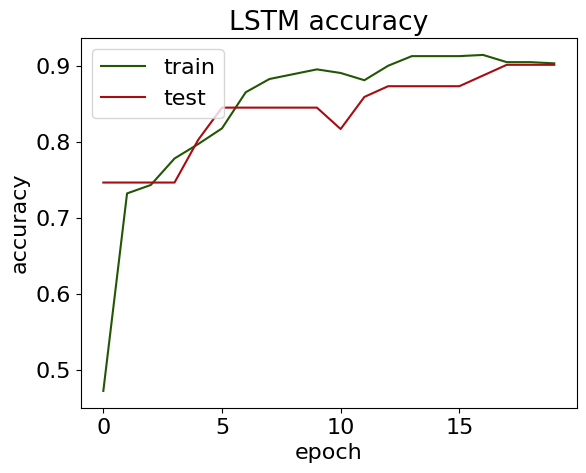

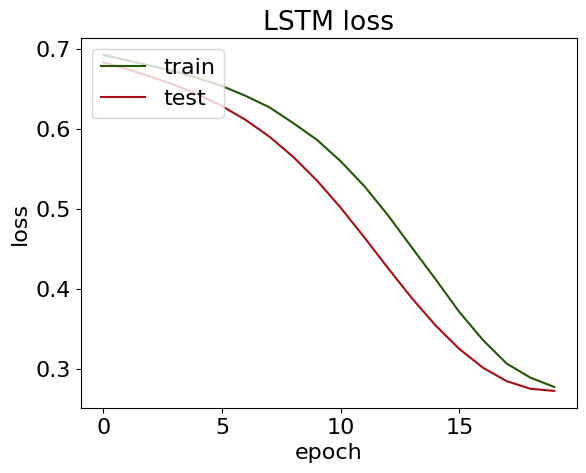

In [64]:
#plot for accuracy
plt.rcParams['font.size'] = 16
plt.plot(history_lstm.history['accuracy'], color='#215704')
plt.plot(history_lstm.history['val_accuracy'], color='#A70C13')
plt.title('LSTM accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plot for loss
plt.plot(history_lstm.history['loss'], color='#215704')
plt.plot(history_lstm.history['val_loss'], color='#A70C13')
plt.title('LSTM loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
y_pred = model_lstm.predict(x_test, batch_size = 4096)

1/1 [==============================] - 0s 373ms/step


In [66]:
y_pred = list(map(lambda x: 0 if x<0.5 else 1, y_pred))

In [67]:
from sklearn.metrics import f1_score

In [68]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [69]:
print("Scores:")
print("Accuracy - " + str(accuracy))
print("Precision - " + str(precision))
print("Recall - " + str(recall))
print("F1-score - " + str(f1_score))

Scores:
Accuracy - 0.9145299145299145
Precision - 0.9537037037037037
Recall - 0.8728813559322034
F1-score - 0.9115044247787611


In [70]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [71]:
metrics_list_train.append({'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-score': f1_score,
                    'fpr': fpr,
                    'tpr': tpr})

In [72]:
ML_DNN_models = ['Naive Bayes','Support vector machine','Decision tree','Random Forest','XGBoost','DNN','CNN','LSTM']

In [73]:
metrics_list_train

[{'Accuracy': 0.8562006079027356,
  'Precision': 0.7981111746645793,
  'Recall': 0.950021978021978,
  'F1-score': 0.8670913117957371,
  'fpr': array([0.        , 0.23863636, 1.        ]),
  'tpr': array([0.        , 0.95142857, 1.        ]),
  'auc': 0.8563961038961039},
 {'Accuracy': 0.953049645390071,
  'Precision': 0.9645950012907599,
  'Recall': 0.9392527472527472,
  'F1-score': 0.9516256320326966,
  'fpr': array([0.        , 0.03409091, 1.        ]),
  'tpr': array([0.  , 0.94, 1.  ]),
  'auc': 0.9529545454545454},
 {'Accuracy': 0.9572543059777102,
  'Precision': 0.9655999429359353,
  'Recall': 0.948043956043956,
  'F1-score': 0.9565369923866225,
  'fpr': array([0.        , 0.03409091, 1.        ]),
  'tpr': array([0.        , 0.95142857, 1.        ]),
  'auc': 0.9586688311688312},
 {'Accuracy': 0.9629685916919959,
  'Precision': 0.9738095238095237,
  'Recall': 0.9506813186813187,
  'F1-score': 0.961861224489796,
  'fpr': array([0.        , 0.02556818, 1.        ]),
  'tpr': array

In [74]:
data_bar_train = pd.DataFrame(metrics_list_train, index=ML_DNN_models)

In [75]:
data_bar_train

,Accuracy,Precision,Recall,F1-score,fpr,tpr,auc
Naive Bayes,0.856201,0.798111,0.950022,0.867091,"[0.0, 0.23863636363636365, 1.0]","[0.0, 0.9514285714285714, 1.0]",0.856396
Support vector machine,0.953050,0.964595,0.939253,0.951626,"[0.0, 0.03409090909090909, 1.0]","[0.0, 0.94, 1.0]",0.952955
Decision tree,0.957254,0.965600,0.948044,0.956537,"[0.0, 0.03409090909090909, 1.0]","[0.0, 0.9514285714285714, 1.0]",0.958669
Random Forest,0.962969,0.973810,0.950681,0.961861,"[0.0, 0.02556818181818182, 1.0]","[0.0, 0.9542857142857143, 1.0]",0.964359
XGBoost,0.961530,0.968428,0.953758,0.960856,"[0.0, 0.03125, 1.0]","[0.0, 0.9542857142857143, 1.0]",0.961518
DNN,0.970085,0.985251,0.954286,0.969521,"[0.0, 0.014204545454545454, 1.0]","[0.0, 0.9542857142857143, 1.0]",0.970041
CNN,0.880342,0.894737,0.864407,0.879310,"[0.0, 0.10344827586206896, 1.0]","[0.0, 0.864406779661017, 1.0]",NaN
LSTM,0.914530,0.953704,0.872881,0.911504,"[0.0, 0.04310344827586207, 1.0]","[0.0, 0.8728813559322034, 1.0]",NaN


In [76]:
data_fpr_tpr_train = pd.DataFrame(metrics_list_train, index=ML_DNN_models)
data_fpr_tpr_train.drop(['Accuracy','Precision','Recall','F1-score'], axis=1, inplace=True)

In [77]:
data_bar_train.drop(['fpr','tpr','auc'], axis=1, inplace=True)

In [78]:
tpr_list_train = data_fpr_tpr_train['tpr'].to_list()
fpr_list_train = data_fpr_tpr_train['fpr'].to_list()

In [79]:
auc_roc_list_train = data_fpr_tpr_train['auc'].values

In [80]:
auc_roc_list_train

array([0.8563961 , 0.95295455, 0.95866883, 0.96435877, 0.96151786,
       0.97004058,        nan,        nan])

In [81]:
clrs2 = ['green', 'orange', 'blue', 'cyan', '#E02BE0', '#57BFFA', '#FF6500', '#F0997D']

In [82]:
bar_plot_data = pd.DataFrame({
    "Accuracy": data_bar_train["Accuracy"].values,
    "Precision": data_bar_train["Precision"].values,
    "Recall": data_bar_train["Recall"].values,
    "F1-score": data_bar_train["F1-score"].values
    },
    index=['Naive Bayes','Support vector machine','Decision tree','Random Forest','XGBoost','DNN', 'CNN', 'LSTM']
)

In [83]:
auc_roc_list_train

array([0.8563961 , 0.95295455, 0.95866883, 0.96435877, 0.96151786,
       0.97004058,        nan,        nan])

In [84]:
clrs2

['green', 'orange', 'blue', 'cyan', '#E02BE0', '#57BFFA', '#FF6500', '#F0997D']

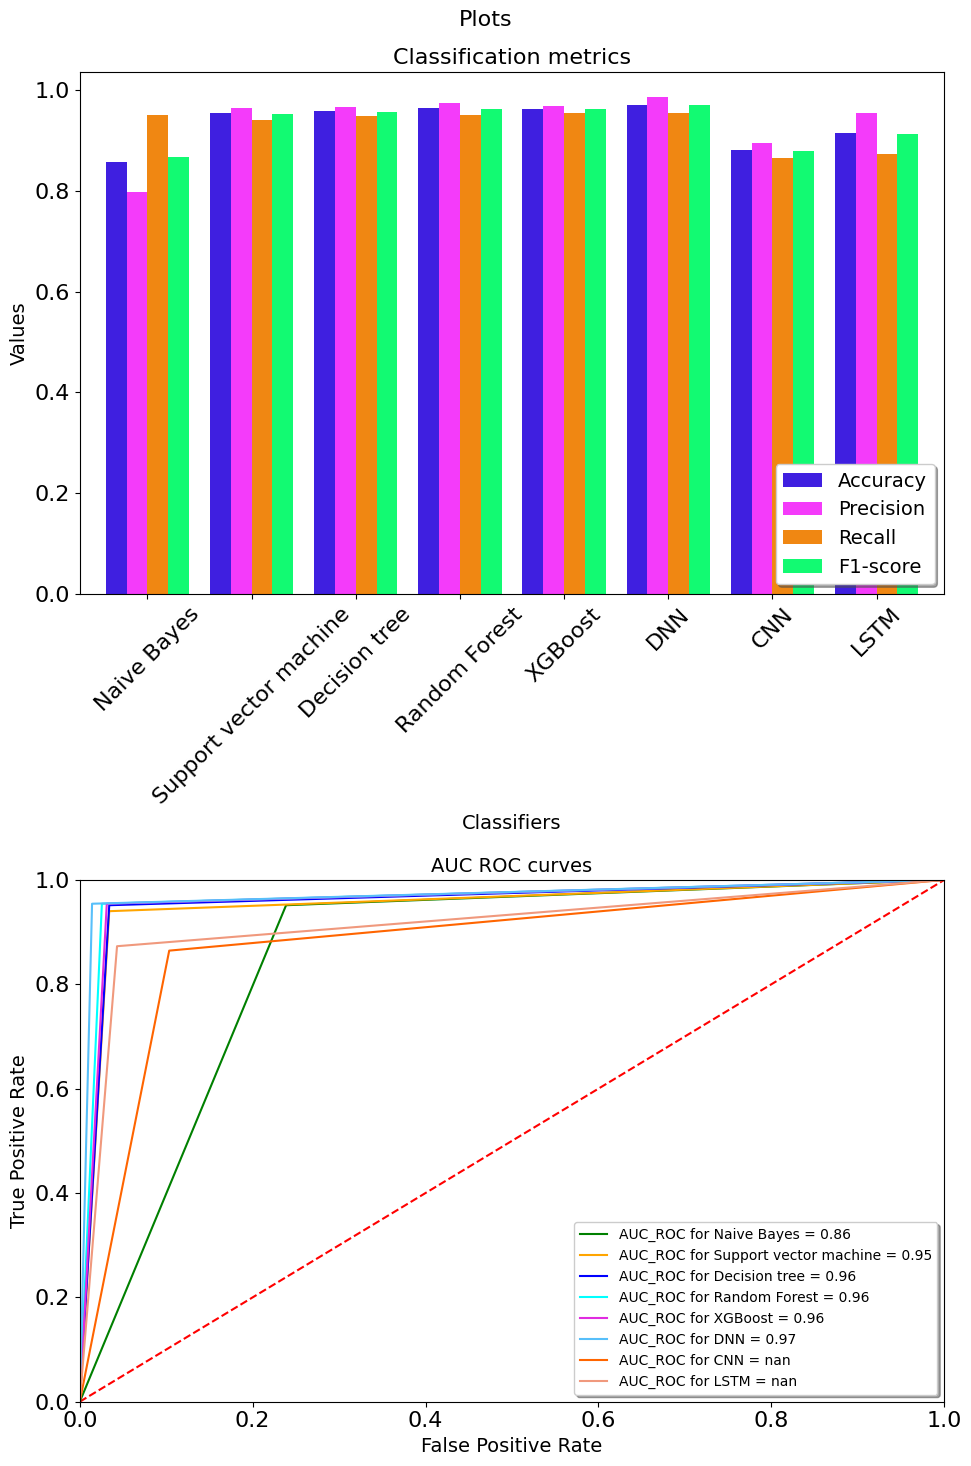

In [85]:
fig, axes = plt.subplots(2, 1, figsize=(10,15))
fig.suptitle('Plots', fontsize = 16)
axes[0].set_title('Classification metrics', fontsize = 16)
clrs = ['#3F1FE0',  '#F43BFA', '#F08712', '#12FA72']
data_bar_train.plot(kind="bar", ax=axes[0], color=clrs, width=0.8, rot=45)
axes[0].set_xlabel('Classifiers', fontsize = 14)
axes[0].set_ylabel('Values', fontsize = 14)
axes[0].legend().remove()
axes[0].legend(loc = 'lower right', fancybox=True, fontsize=14, shadow = True)

axes[1].set_title('AUC ROC curves', fontsize = 14)
axes[1].plot([0, 1], [0, 1],'r--')
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('True Positive Rate', fontsize = 14)
axes[1].set_xlabel('False Positive Rate', fontsize = 14)
for i in range(len(auc_roc_list_train)):
    axes[1].plot(fpr_list_train[i], tpr_list_train[i], clrs2[i], label = 'AUC_ROC for ' + ML_DNN_models[i] + ' = %0.2f' % auc_roc_list_train[i])

axes[1].legend(loc = 'lower right', fancybox=True, fontsize=10, shadow = True)
fig.tight_layout()
plt.show()